In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [6]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_yds_comp_salary_19-20')

In [7]:
qbs.dtypes

NAME              object
YDS/COMP         float64
YDS/COMP_rank    float64
salary             int64
dtype: object

In [8]:
qbs.head()

,NAME,YDS/COMP,YDS/COMP_rank,salary
0,Matthew Stafford,13.4,2.5,27000000
1,Matt Barkley,13.3,4.0,2000000
2,Patrick Mahomes,12.6,7.5,4106447
3,Jimmy Garoppolo,12.1,10.0,27500000
4,Russell Wilson,12.1,10.0,35000000


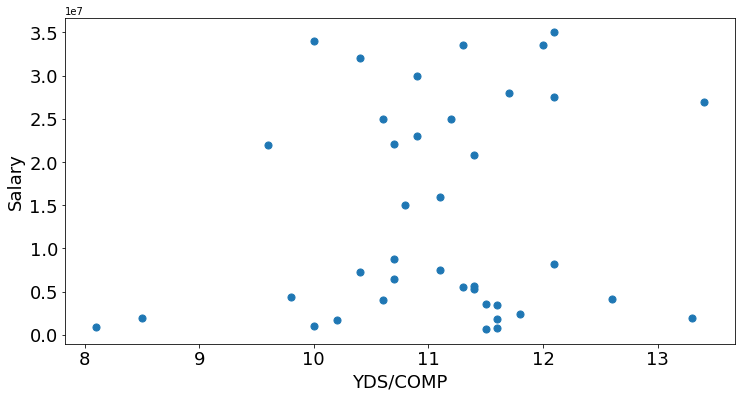

In [9]:
ax = qbs.plot(kind="scatter", x = 'YDS/COMP',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/COMP', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [10]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['YDS/COMP', 'salary']])

In [11]:
X.mean(axis = 0)

array([-1.43474975e-15, -5.69345141e-18])

In [12]:
X.std(axis = 0)

array([1., 1.])

In [13]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [14]:
km.cluster_centers_

array([[-0.60538256, -0.72176656],
       [-0.36546403,  0.86244002],
       [ 0.69247268, -0.84819641],
       [-2.62908998, -1.02812308],
       [ 0.9686121 ,  1.42031588]])

In [15]:
km.predict(X)

array([4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 3], dtype=int32)

In [16]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,YDS/COMP,YDS/COMP_rank,salary,clusters
0,Matthew Stafford,13.4,2.5,27000000,4
1,Matt Barkley,13.3,4.0,2000000,2
2,Patrick Mahomes,12.6,7.5,4106447,2
3,Jimmy Garoppolo,12.1,10.0,27500000,4
4,Russell Wilson,12.1,10.0,35000000,4


In [17]:
ss.inverse_transform(km.cluster_centers_)

array([[1.04375000e+01, 5.14377738e+06],
       [1.06909091e+01, 2.40812121e+07],
       [1.18083333e+01, 3.63244850e+06],
       [8.30000000e+00, 1.48162450e+06],
       [1.21000000e+01, 3.07500000e+07]])

In [18]:
qbs.groupby('clusters')[['YDS/COMP', 'salary']].mean()

,YDS/COMP,salary
clusters,,
0,10.437500,5.143777e+06
1,10.690909,2.408121e+07
2,11.808333,3.632448e+06
3,8.300000,1.481624e+06
4,12.100000,3.075000e+07


In [19]:
centroids = qbs.groupby('clusters')[['YDS/COMP', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

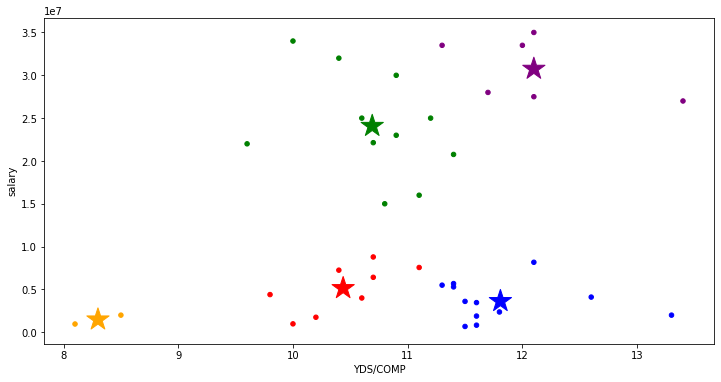

In [20]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'YDS/COMP', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/COMP', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [21]:
km.inertia_

13.190676747599653

In [22]:
silhouette_score(X, km.labels_)

0.45586366609971907